# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab

# Quick demonstration of python stat functions

Random number generation: normal distribution with mean 0, stddev 1

In [2]:
np.random.normal(0, 1)

0.19377257537633105

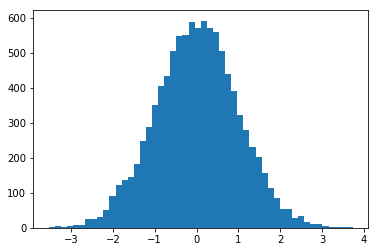

In [3]:
y = []
for i in range(0, 10000):
    y.append(np.random.normal(0, 1))
plt.hist(y, bins=50)
plt.show()

# Utility functions

In [4]:
def next_turn(mean, drift, zscores, zscore_drifts, intraturn_variance):
    mean += drift # no intraturn variance for overall mean (yet) for sake of simplicity
    for i in range(0, len(zscores)):
        zscores[i] += np.random.normal(zscore_drifts[i], intraturn_variance)
    return mean, zscores

In [5]:
def draw_number_based_on_zscore(mean, std_dev, zscore):
    return mean + zscore * std_dev

# Player paths function

In [6]:
def plot_paths(intraturn_variance, num_turns, mean, drift, std_dev, zscores, zscore_drifts):
    
    # Initializing list / starting position
    all_incomes = []
    all_zscores = []
    for i in range(0, len(zscores)):
        all_incomes.append([])
        all_zscores.append([])
        all_incomes[i].append(draw_number_based_on_zscore(mean, std_dev, zscores[i]))
        all_zscores[i].append(zscores[i])

    # run simulations
    for i in range(0, num_turns):
        mean, zscores = next_turn(mean, drift, zscores, zscore_drifts, intraturn_variance)
        for i in range(0, len(zscores)):
            all_incomes[i].append(draw_number_based_on_zscore(mean, std_dev, zscores[i]))
            all_zscores[i].append(zscores[i])
    
    # Plotting simulations
    turns = list(range(0, num_turns+1))
    plt.figure(1, figsize=(15, 8))
    
    plt.subplot(221)
    for i in range(0, len(zscores)):
        plt.plot(turns, all_incomes[i], label='Player ' + str(i+1))
    plt.legend(loc='best')
    plt.xlabel('Turn')
    plt.ylabel('Income')
    
    plt.subplot(222)
    for i in range(0, len(zscores)):
        plt.plot(turns, all_zscores[i], label='Player ' + str(i+1))
    plt.legend(loc='best')
    plt.xlabel('Turn')
    plt.ylabel('Zscore / relative ranking')
    
    plt.show()

# Player paths visualized

### One player, no national drift, no personal drift

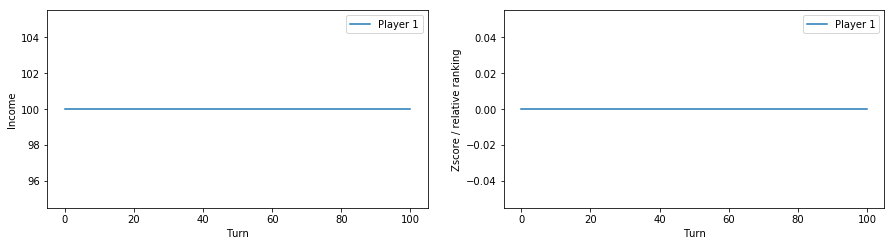

In [7]:
plot_paths(intraturn_variance=0, num_turns=100, mean=100, drift=0, std_dev=25, zscores=[0], zscore_drifts=[0])

### Two players, national drift up, no personal drift

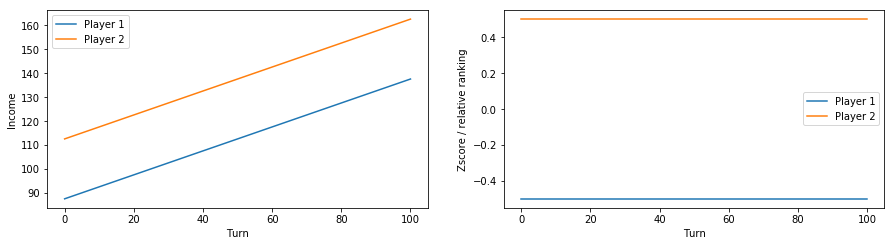

In [8]:
plot_paths(intraturn_variance=0, num_turns=100, mean=100, drift=0.5, std_dev=25, zscores=[-0.5, 0.5], zscore_drifts=[0, 0])

### Five players, national drift up, no personal drift but some intraturn variance

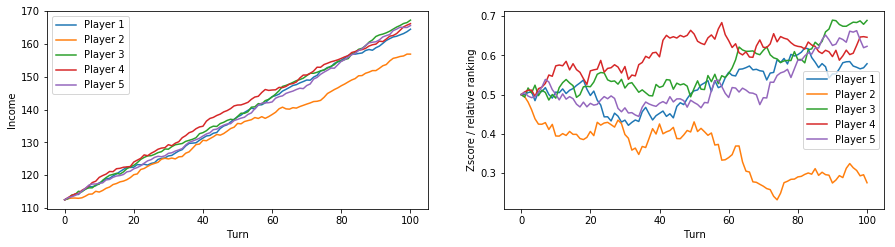

In [9]:
plot_paths(intraturn_variance=0.015, num_turns=100, mean=100, drift=0.5, std_dev=25, 
           zscores=[0.5, 0.5, 0.5, 0.5, 0.5], zscore_drifts=[0, 0, 0, 0, 0])

### Five players, national drift up, player 1 has upwards drift

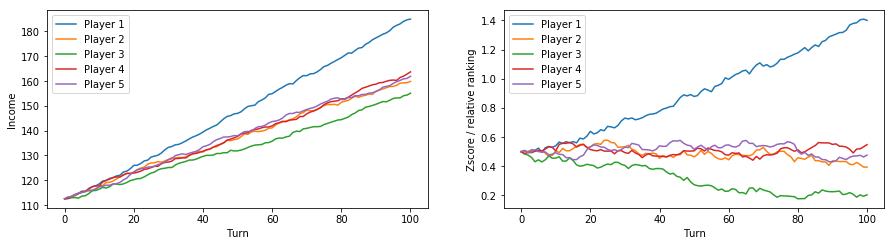

In [10]:
plot_paths(intraturn_variance=0.015, num_turns=100, mean=100, drift=0.5, std_dev=25, 
           zscores=[0.5, 0.5, 0.5, 0.5, 0.5], zscore_drifts=[0.01, 0, 0, 0, 0])

### Five players, national drift downwards, personal drifts vary by player

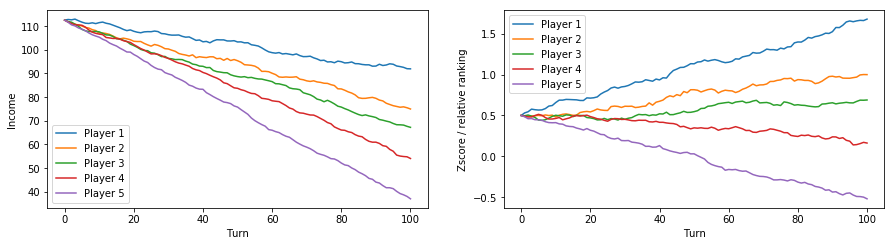

In [11]:
plot_paths(intraturn_variance=0.015, num_turns=100, mean=100, drift=-0.5, std_dev=25, 
           zscores=[0.5, 0.5, 0.5, 0.5, 0.5], zscore_drifts=[0.01, 0.005, 0, -0.005, -0.01])